In [2]:
 import keras
 from keras.datasets import cifar10

 # load train and test datasets
 (Xtrain,Ytrain),(Xtest,Ytest)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


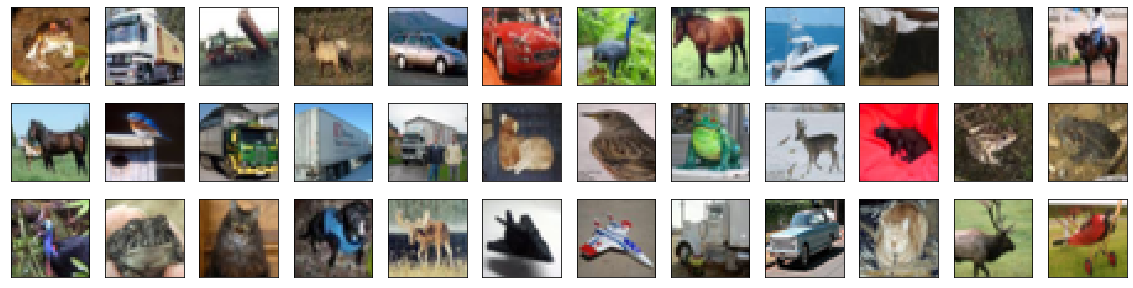

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

figt =plt.figure(figsize=(20,5))
for i in range(36):
  ax=figt.add_subplot(3,12,i+1, xticks=[],yticks=[])
  ax.imshow(np.squeeze(Xtrain[i]))

In [0]:
# rescale [0,255]-->[0,1]
Xtrain = Xtrain.astype('float32')/255
Xtest =Xtest.astype('float32')/255

In [0]:
from keras.preprocessing.image import ImageDataGenerator

#create and configure augmented image generator

datagen= ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

#fit augmented image generator on data
datagen.fit(Xtrain)

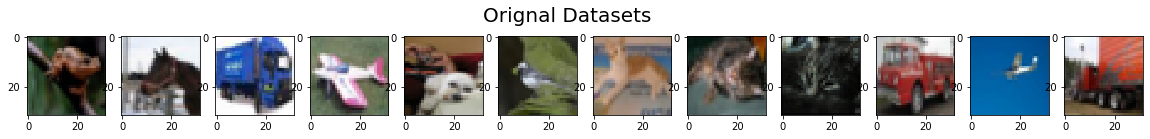

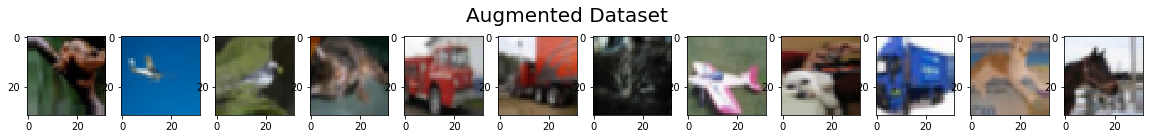

In [14]:
import matplotlib.pyplot as plt

XtrainSubset=Xtrain[:12]

fig =plt.figure(figsize=(20,2))
for i in range(len(XtrainSubset)):
  ax=fig.add_subplot(1,12,i+1)
  ax.imshow(XtrainSubset[i])
fig.suptitle('Orignal Datasets',fontsize=20)

fig =plt.figure(figsize=(20,2))
for Xbatch in datagen.flow(XtrainSubset,batch_size=12):
  for i in range(len(XtrainSubset)):
    ax=fig.add_subplot(1,12,i+1)
    ax.imshow(Xbatch[i])
  fig.suptitle('Augmented Dataset',fontsize=20)
  plt.show()
  break;


In [5]:
from keras.utils import np_utils

#one hot encoding of labels
num_classes =len(np.unique(Ytrain))
Ytrain=keras.utils.to_categorical(Ytrain,num_classes)
Ytest=keras.utils.to_categorical(Ytest,num_classes)

#break training set into training and validation sets
(Xtrain,Xvalid)=Xtrain[5000:],Xtrain[:5000]
(Ytrain,Yvalid)=Ytrain[5000:],Ytrain[:5000]

# shape of training sets
print('Xtrain shape: ',Xtrain.shape)

#print number of training, validation, and test images
print(Xtrain.shape[0],'train samples')
print(Xtest.shape[0],'test samples')
print(Xvalid.shape[0],'valid samples')

Xtrain shape:  (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 valid samples


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#define the model
model =Sequential()
model.add(Flatten(input_shape=Xtrain.shape[1:]))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# summarize the model
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
T

In [7]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Flatten

#define the model
model =Sequential()
model.add(Convolution2D(filters=16, kernel_size=2, padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=32, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=64, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)        

In [8]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint

#train the model
checkpointer= ModelCheckpoint(filepath='MLP.weights.best.hdf5',verbose=1,save_best_only=True)
hist= model.fit(Xtrain,Ytrain,batch_size=32,epochs=20,validation_data=(Xvalid,Yvalid),callbacks=[checkpointer], verbose=2,shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 45s - loss: 1.2771 - acc: 0.5733 - val_loss: 1.1169 - val_acc: 0.6388

Epoch 00001: val_loss improved from inf to 1.11689, saving model to MLP.weights.best.hdf5
Epoch 2/20
 - 44s - loss: 1.2619 - acc: 0.5835 - val_loss: 1.2320 - val_acc: 0.6246

Epoch 00002: val_loss did not improve from 1.11689
Epoch 3/20
 - 44s - loss: 1.2570 - acc: 0.5858 - val_loss: 1.6108 - val_acc: 0.4880

Epoch 00003: val_loss did not improve from 1.11689
Epoch 4/20
 - 43s - loss: 1.2666 - acc: 0.5808 - val_loss: 1.1324 - val_acc: 0.6250

Epoch 00004: val_loss did not improve from 1.11689
Epoch 5/20
 - 43s - loss: 1.2730 - acc: 0.5804 - val_loss: 1.4712 - val_acc: 0.5754

Epoch 00005: val_loss did not improve from 1.11689
Epoch 6/20
 - 43s - loss: 1.2850 - acc: 0.5803 - val_loss: 1.2539 - val_acc: 0.5810

Epoch 00006: val_loss did not improve from 1.11689
Epoch 7/20
 - 43s - loss: 1.2929 - acc: 0.5705 - val_loss: 1.1647 - val_acc: 0.5984

Epoch 00007

In [0]:
#load the weights
model.load_weights('MLP.weights.best.hdf5')

In [54]:
#evaluate test accuracy
 score=model.evaluate(Xtest,Ytest,verbose=0)
 accuracy=100*score[1]

 #print test accuracy after training
 print('Test accuracy:',accuracy)

Test accuracy: 69.54
